Edge Detection using Sobel Operator
====================================================

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = "assassins-creed-origins-6l.jpg"
img = imread(image)

[nx,ny,c] = img.shape

**Convert  RGB to gray scale**

In [3]:
greyImg = img.mean(axis = 2, keepdims = True)/255.0
greyImg = np.concatenate([greyImg]*3, axis = 2)

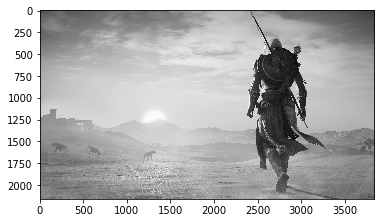

In [4]:
plt.imshow(greyImg)

**Define the Sobel Filters**
1. Gx
2. Gy

In [5]:
Gx = [[-1.0,-2.0,-1.0],
      [ 0.0, 0.0, 0.0],
      [ 1.0, 2.0, 1.0]] #Horizontal Filter

Gy = [[-1.0, 0.0, 1.0],
     [-2.0, 0.0, 2.0],
     [-1.0, 0.0, 1.0]] #vertical_filter

gaussian_blurr = [[0,1,0],
                  [1,2,1],
                  [0,1,0]]

In [6]:
new_image = np.zeros_like(img)

In [7]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = img[row-1:row+2, col-1:col+2,0]
        transformed_pixels = gaussian_blurr*local_pixels
        score = (transformed_pixels.sum() + 4)/8
        new_image[row,col] = [score]*3

In [8]:
vertical_edges_img = np.zeros_like(img)
horizontal_edges_img = np.zeros_like(img)

In [9]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2, col-1:col+2,0]
        transformed_pixels = Gy*local_pixels
        vertical_score = (transformed_pixels.sum() + 4)/8
        horizontal_edges_img[row,col] = [vertical_score]*3 

In [10]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2, col-1:col+2,0]
        transformed_pixels = Gx*local_pixels
        horizontal_score = (transformed_pixels.sum() + 4)/8
        vertical_edges_img[row,col] = [horizontal_score]*3 

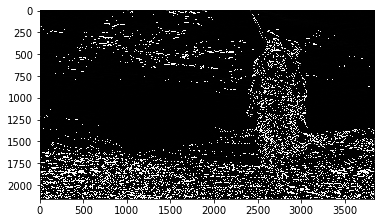

In [11]:
plt.imshow(vertical_edges_img, cmap = plt.get_cmap('gray'))

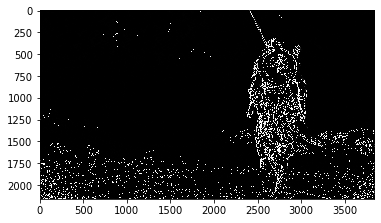

In [12]:
plt.imshow(horizontal_edges_img, cmap = plt.get_cmap('gray'))

In [13]:
edges_img = np.zeros_like(img)

In [14]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2,col-1:col+2,0]
        
        vertical_transformed_pixels = Gy*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = Gx*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**0.5
        edges_img[row,col] = [edge_score]*3
        
edges_img = edges_img/edges_img.max()

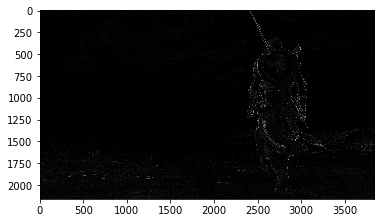

In [15]:
plt.imshow(edges_img)
plt.savefig('assassins_1', dpi = 500, quality = 95)